In [254]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from scipy.special import expit
from sklearn.metrics import accuracy_score, roc_curve

In [255]:
X = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data\Gisette\gisette_train.data', sep = ' ', header= None)
y = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data\Gisette\gisette_train.labels', header = None)
Xt = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data\Gisette\gisette_valid.data', sep = ' ', header = None)
yt = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data\Gisette\gisette_valid.labels', header= None)

X = X.drop(5000, axis = 1)
Xt = Xt.drop(5000, axis = 1)

scaler = StandardScaler()
Xs = scaler.fit_transform(X)
Xts = scaler.transform(Xt)

Xs = np.hstack([np.ones((Xs.shape[0], 1)), Xs])
Xts = np.hstack([np.ones((Xts.shape[0], 1)), Xts])

y = np.where(y == -1, 0, 1)
yt = np.where(yt == -1, 0, 1)


In [256]:
def grad(X, y, w):
    ywx = y * np.matmul(w, X.T)
    dl = (2*(ywx - 1)/(1 + (ywx - 1)**2))
    dl = np.where(ywx > 1, 0 , dl)
    g = (1/X.shape[0])*np.matmul(dl * y, X ) + 2*s*w
    return g

In [257]:
def loss(X,y,w):
    yxw = y * np.matmul(w, X.T)
    toadd = np.log(1 + (yxw - 1)**2)
    toadd = np.where(yxw > 1, 0, toadd)
    tot = (1/X.shape[0])*np.sum(toadd) + s*(np.linalg.norm(w)**2)
    return tot

In [258]:
def schedule(k, p, mu, iter):
    sch = []
    for i in range(iter):
        mi = k + (p-k)*np.max([0, (iter - 2*i)/(2*i*mu + iter)])
        mi = np.min([p - 1, mi])
        sch.append(round(mi))
    return sch

In [259]:
s = 0.001
iterations = 300
def fit(X,y, eta, des_feat):
    w = np.zeros(X.shape[1])
    y = y.squeeze()
    feat_ind = range(X.shape[1])
    sch = schedule(des_feat, X.shape[1] + 1, 300, iterations)
    for i in range(iterations):
        w[feat_ind] = w[feat_ind] - eta*grad(X[:, feat_ind], y, w[feat_ind])
        feat_ind = np.abs(w).argsort()[-(sch[i]):]
        w1 = np.zeros(X.shape[1])
        w1[feat_ind] = w[feat_ind]
        w = w1
    return w

In [260]:
#from hw4
def score(X, y, w):
    Xw = np.matmul(X,w)
    p = np.where(expit(Xw) > 0.5, 1, 0)
    return accuracy_score(p, y)

In [261]:
w0 = fit(Xs,y, 0.01, 500)
score(Xs, y, w0)

0.9105

In [262]:
def loss_v_iter(X,y,eta):
    liter = []
    w = np.zeros(X.shape[1])
    y = y.squeeze()
    feat_ind = range(X.shape[1])
    sch = schedule(100, X.shape[1] + 1, 300, iterations)
    for i in range(iterations):
        w[feat_ind] = w[feat_ind] - eta*grad(X[:, feat_ind], y, w[feat_ind])
        feat_ind = np.abs(w).argsort()[-(sch[i]):]
        w1 = np.zeros(X.shape[1])
        w1[feat_ind] = w[feat_ind]
        w = w1
        liter.append(loss(X,y,w))
    return liter

In [263]:
gis_liter = loss_v_iter(Xs, y, 0.01)

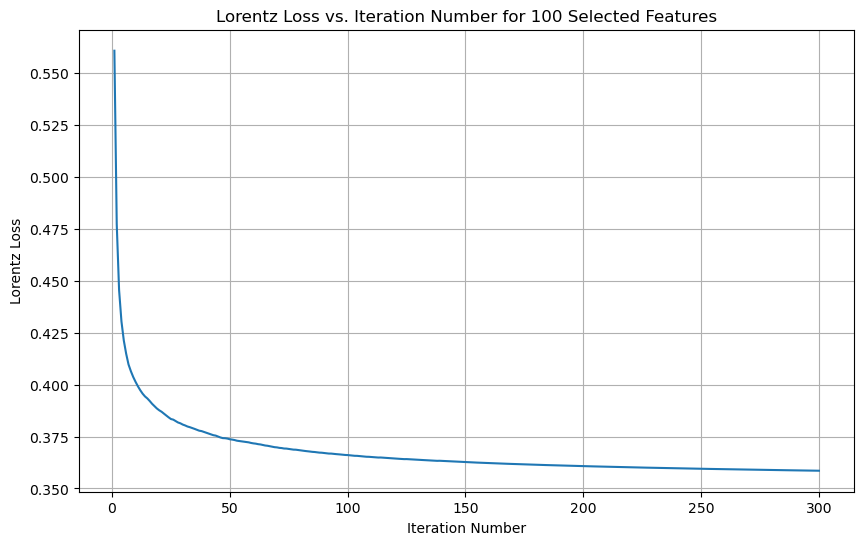

In [264]:
plt.figure(figsize=(10,6))
plt.plot(range(1,iterations + 1), gis_liter)
plt.ylabel('Lorentz Loss')
plt.xlabel('Iteration Number')
plt.title('Lorentz Loss vs. Iteration Number for 100 Selected Features')
plt.grid()
plt.show()

In [265]:
desired_features = [10, 30, 100, 300, 500]

In [266]:
misclass_train = []
misclass_test = []
for d in desired_features:
    w = fit(Xs, y, 0.01, d)
    wt = fit(Xts, yt, 0.01, d)
    misclass_train.append(1 - score(Xs, y, w))
    misclass_test.append(1 - score(Xts, yt, wt))


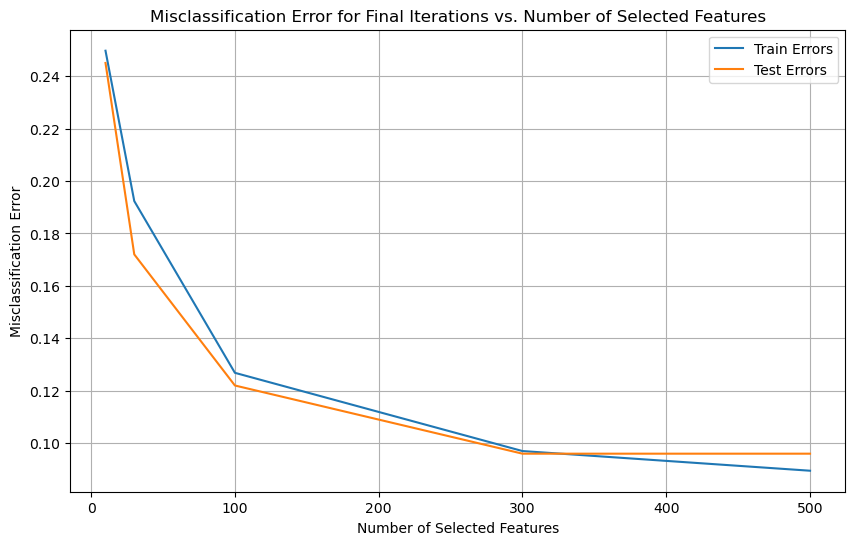

In [267]:
plt.figure(figsize=(10,6))
plt.plot(desired_features, misclass_train, label = 'Train Errors')
plt.plot(desired_features, misclass_test, label = 'Test Errors')
plt.title('Misclassification Error for Final Iterations vs. Number of Selected Features')
plt.xlabel('Number of Selected Features')
plt.ylabel('Misclassification Error')
plt.grid()
plt.legend()
plt.show()

In [268]:
misclass_train

[0.2496666666666667,
 0.19233333333333336,
 0.12683333333333335,
 0.09699999999999998,
 0.08950000000000002]

In [269]:
misclass_test

[0.245, 0.17200000000000004, 0.122, 0.09599999999999997, 0.09599999999999997]

In [270]:
w_100 = fit(Xs,y,0.01,100)

In [271]:
prob_y_100 = expit(np.matmul(Xs, w_100))
prob_yt_100 = expit(np.matmul(Xts, w_100))
fpr_train, tpr_train, _ = roc_curve(y, prob_y_100)
fpr_test, tpr_test, _ = roc_curve(yt, prob_yt_100)

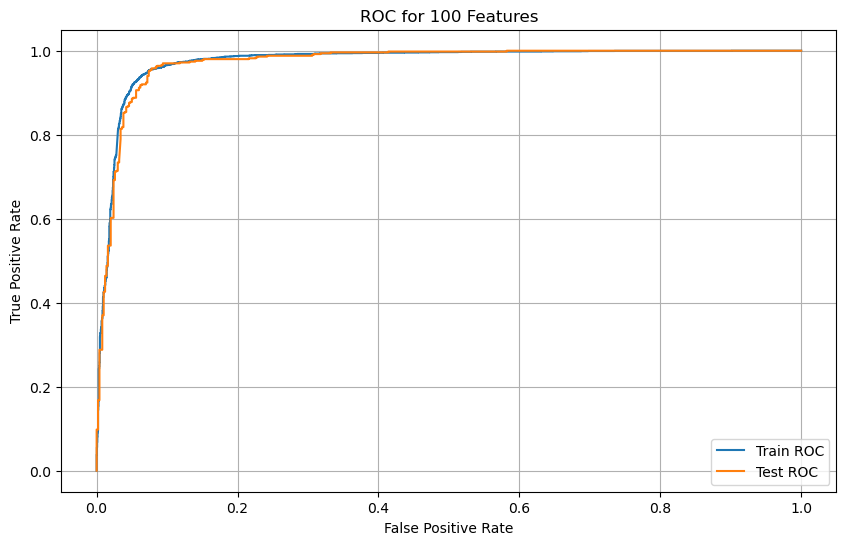

In [272]:
plt.figure(figsize=(10,6))
plt.plot(fpr_train, tpr_train, label= 'Train ROC')
plt.plot(fpr_test, tpr_test, label = 'Test ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for 100 Features')
plt.grid()
plt.legend()
plt.show()

# Dexter dataset

In [273]:
X = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data\Dexter\dexter_train.csv', header= None)
y = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data\Dexter\dexter_train.labels', header = None)
Xt = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data\Dexter\dexter_valid.csv', header= None)
yt = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data\Dexter\dexter_valid.labels', header = None)

scaler = StandardScaler()
Xs = scaler.fit_transform(X)
Xts = scaler.transform(Xt)

Xs = np.hstack([np.ones((Xs.shape[0], 1)), Xs])
Xts = np.hstack([np.ones((Xts.shape[0], 1)), Xts])

y = np.where(y == -1, 0, 1)
yt = np.where(yt == -1, 0, 1)

In [274]:
w0 = fit(Xs,y, 0.0001, 100)
score(Xs, y, w0)

0.8966666666666666

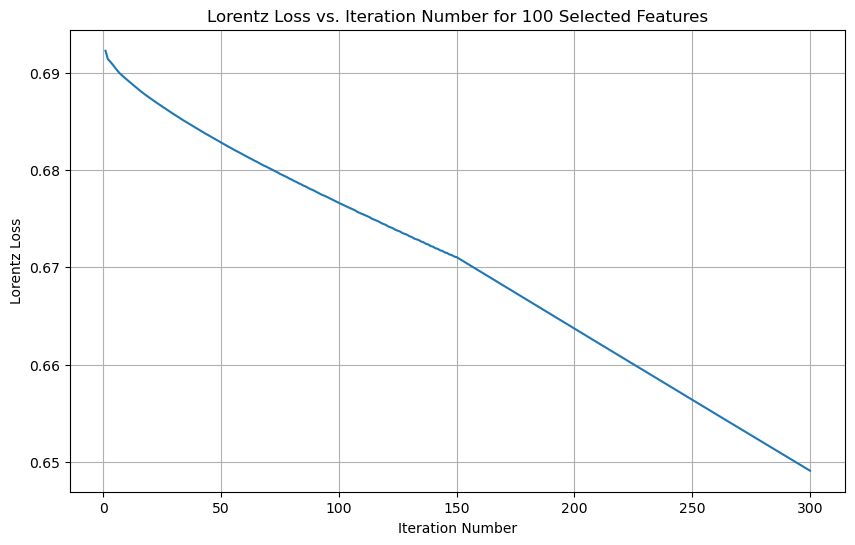

In [275]:
dex_liter = loss_v_iter(Xs, y, 0.0001)
plt.figure(figsize=(10,6))
plt.plot(range(1,iterations + 1), dex_liter)
plt.ylabel('Lorentz Loss')
plt.xlabel('Iteration Number')
plt.title('Lorentz Loss vs. Iteration Number for 100 Selected Features')
plt.grid()
plt.show()

In [276]:
misclass_train = []
misclass_test = []
for d in desired_features:
    w = fit(Xs, y, 0.0001, d)
    wt = fit(Xts, yt, 0.0001, d)
    misclass_train.append(1 - score(Xs, y, w))
    misclass_test.append(1 - score(Xts, yt, wt))

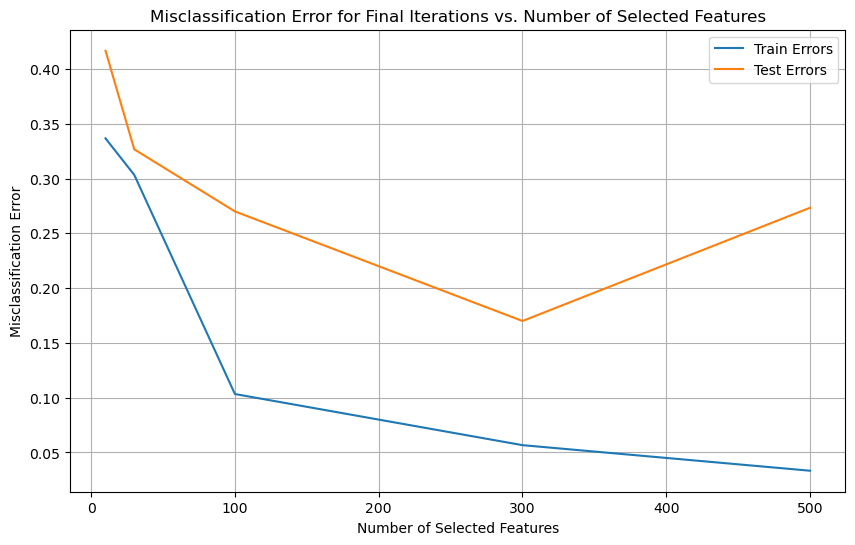

In [277]:
plt.figure(figsize=(10,6))
plt.plot(desired_features, misclass_train, label = 'Train Errors')
plt.plot(desired_features, misclass_test, label = 'Test Errors')
plt.title('Misclassification Error for Final Iterations vs. Number of Selected Features')
plt.xlabel('Number of Selected Features')
plt.ylabel('Misclassification Error')
plt.grid()
plt.legend()
plt.show()

In [278]:
misclass_train

[0.33666666666666667,
 0.30333333333333334,
 0.10333333333333339,
 0.05666666666666664,
 0.033333333333333326]

In [279]:
misclass_test

[0.41666666666666663,
 0.32666666666666666,
 0.27,
 0.17000000000000004,
 0.2733333333333333]

In [280]:
w_100 = fit(Xs,y,0.0001,100)
prob_y_100 = expit(np.matmul(Xs, w_100))
prob_yt_100 = expit(np.matmul(Xts, w_100))
fpr_train, tpr_train, _ = roc_curve(y, prob_y_100)
fpr_test, tpr_test, _ = roc_curve(yt, prob_yt_100)

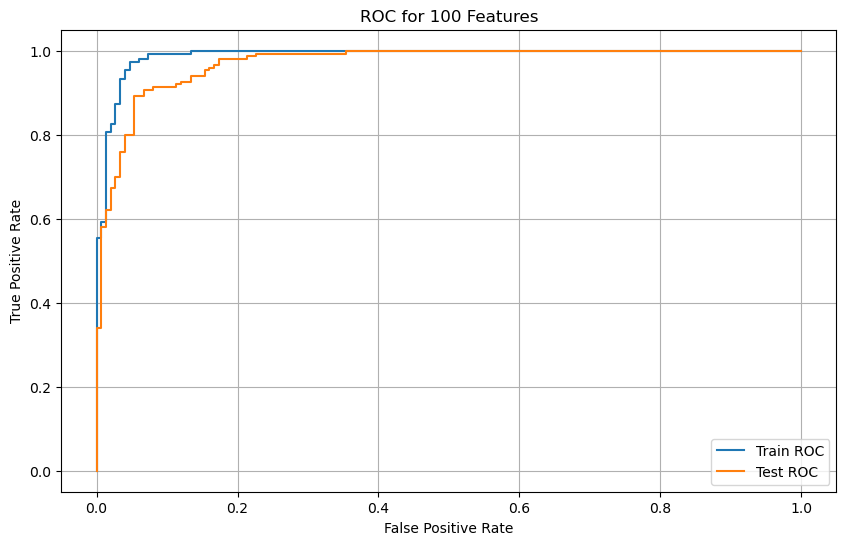

In [281]:
plt.figure(figsize=(10,6))
plt.plot(fpr_train, tpr_train, label= 'Train ROC')
plt.plot(fpr_test, tpr_test, label = 'Test ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for 100 Features')
plt.grid()
plt.legend()
plt.show()

# Madelon Dataset

In [282]:
X = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data\MADELON\madelon_train.data', sep = ' ', header= None)
y = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data\MADELON\madelon_train.labels', header = None)
Xt = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data\MADELON\madelon_valid.data', sep = ' ', header = None)
yt = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data\MADELON\madelon_valid.labels', header= None)

X = X.drop(500, axis = 1)
Xt = Xt.drop(500, axis= 1)

scaler = StandardScaler()
Xs = scaler.fit_transform(X)
Xts = scaler.transform(Xt)

Xs = np.hstack([np.ones((Xs.shape[0], 1)), Xs])
Xts = np.hstack([np.ones((Xts.shape[0], 1)), Xts])

y = np.where(y == -1, 0, 1)
yt = np.where(yt == -1, 0, 1)

In [283]:
w0 = fit(Xs,y, 0.0001, 100)
score(Xs, y, w0)

0.5735

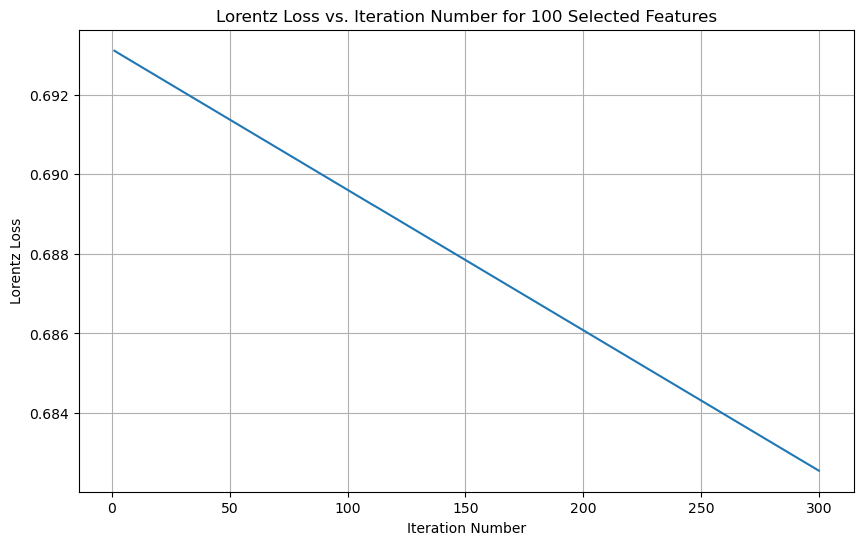

In [284]:
mad_liter = loss_v_iter(Xs, y, 0.0001)
plt.figure(figsize=(10,6))
plt.plot(range(1,iterations + 1), mad_liter)
plt.ylabel('Lorentz Loss')
plt.xlabel('Iteration Number')
plt.title('Lorentz Loss vs. Iteration Number for 100 Selected Features')
plt.grid()
plt.show()

In [285]:
misclass_train = []
misclass_test = []
for d in desired_features:
    w = fit(Xs, y, 0.0001, d)
    wt = fit(Xts, yt, 0.0001, d)
    misclass_train.append(1 - score(Xs, y, w))
    misclass_test.append(1 - score(Xts, yt, wt))

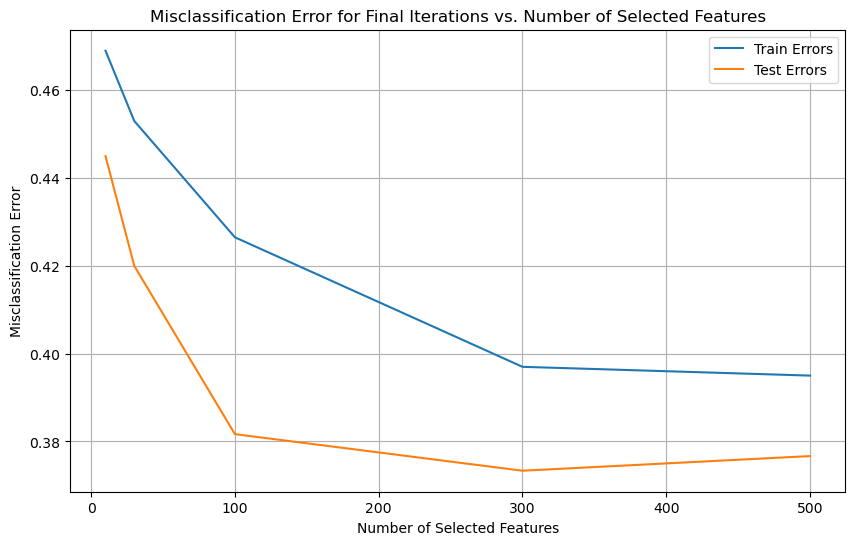

In [286]:
plt.figure(figsize=(10,6))
plt.plot(desired_features, misclass_train, label = 'Train Errors')
plt.plot(desired_features, misclass_test, label = 'Test Errors')
plt.title('Misclassification Error for Final Iterations vs. Number of Selected Features')
plt.xlabel('Number of Selected Features')
plt.ylabel('Misclassification Error')
plt.grid()
plt.legend()
plt.show()

In [287]:
misclass_train

[0.469, 0.45299999999999996, 0.4265, 0.397, 0.395]

In [288]:
misclass_test

[0.44499999999999995,
 0.42000000000000004,
 0.3816666666666667,
 0.3733333333333333,
 0.3766666666666667]

In [289]:
w_100 = fit(Xs,y,0.0001,100)
prob_y_100 = expit(np.matmul(Xs, w_100))
prob_yt_100 = expit(np.matmul(Xts, w_100))
fpr_train, tpr_train, _ = roc_curve(y, prob_y_100)
fpr_test, tpr_test, _ = roc_curve(yt, prob_yt_100)

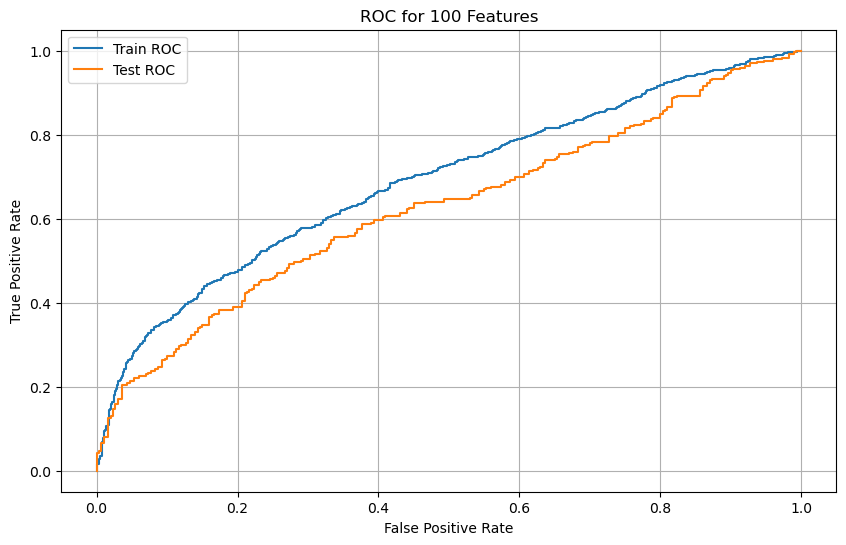

In [290]:
plt.figure(figsize=(10,6))
plt.plot(fpr_train, tpr_train, label= 'Train ROC')
plt.plot(fpr_test, tpr_test, label = 'Test ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for 100 Features')
plt.grid()
plt.legend()
plt.show()